<a href="https://colab.research.google.com/github/baekbyte/LLM-Fine-tuning/blob/main/LLM_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/baekbyte/LLM-Fine-tuning.git
%cd LLM-Fine-tuning

Cloning into 'LLM-Fine-tuning'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 101 (delta 26), reused 89 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (101/101), 180.37 KiB | 20.04 MiB/s, done.
Resolving deltas: 100% (26/26), done.
/content/LLM-Fine-tuning


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers datasets accelerate
!pip install wandb

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 127.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6.9 MB/s e

In [ ]:
import torch

# Check if CUDA is available
print(f"CUDA available: {torch.cuda.is_available()}")

# Get GPU name
if torch.cuda.is_available():
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
    print(f"GPU count: {torch.cuda.device_count()}")

    # Get memory info
    print(f"GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    print("No CUDA GPU detected")

CUDA available: True
GPU name: Tesla T4
GPU count: 1
GPU memory: 14.7 GB


In [ ]:
%cd /content/LLM-Fine-tuning


/content/LLM-Fine-tuning


In [ ]:
print("Running data loading script...")
%run /content/LLM-Fine-tuning/code-explaination-model/scripts/load-data.py

Running data loading script...
Starting CodeT5 dataset collection...
Created directory structure

CodeXGLUE Dataset


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

python/train-00000-of-00002.parquet:   0%|          | 0.00/144M [00:00<?, ?B/s]

python/train-00001-of-00002.parquet:   0%|          | 0.00/147M [00:00<?, ?B/s]

python/validation-00000-of-00001.parquet:   0%|          | 0.00/16.7M [00:00<?, ?B/s]

python/test-00000-of-00001.parquet:   0%|          | 0.00/18.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/251820 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13914 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/14918 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/251820 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/13914 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/14918 [00:00<?, ? examples/s]

Downloaded dataset with 251820 training examples

Exploring CodeXGLUE dataset structure:
  Dataset keys: ['train', 'validation', 'test']
Training samples: 251820
Feature columns: ['id', 'repo', 'path', 'func_name', 'original_string', 'language', 'code', 'code_tokens', 'docstring', 'docstring_tokens', 'sha', 'url']
Sample data structure:
id: 0
repo: proycon/pynlpl
path: pynlpl/formats/folia.py
func_name: AbstractElement.settext
original_string: def settext(self, text, cls='current'):
        """Set the text for this element.

        Arguments...
language: python
code: def settext(self, text, cls='current'):
        """Set the text for this element.

        Arguments...
code_tokens: ['def', 'settext', '(', 'self', ',', 'text', ',', 'cls', '=', "'current'", ')', ':', 'self', '.', 'replace', '(', 'TextContent', ',', 'value', '=', 'text', ',', 'cls', '=', 'cls', ')']
docstring: Set the text for this element.

        Arguments:
            text (str): The text
            cls ...
docstrin

In [ ]:
# Simple approach for Colab
import json
import os
from pathlib import Path

# Create directories
Path("data/processed").mkdir(parents=True, exist_ok=True)
Path("data/splits").mkdir(parents=True, exist_ok=True)

# Try to load dataset with simpler approach
try:
    from datasets import load_dataset
    print("Trying to load dataset...")

    # Try CodeSearchNet first (more stable)
    dataset = load_dataset("code_search_net", "python", split="train[:1000]")
    print(f"Loaded {len(dataset)} examples from CodeSearchNet")

    # Format the data
    formatted_data = []
    for example in dataset:
        if 'func_code_string' in example and 'func_documentation_string' in example:
            code = example['func_code_string']
            doc = example['func_documentation_string']
            if code and doc and code.strip() and doc.strip():
                formatted_data.append({
                    'code': code.strip(),
                    'explanation': doc.strip()
                })

    print(f"Formatted {len(formatted_data)} examples")

    # Save the data
    with open("data/processed/dataset.json", "w") as f:
        json.dump(formatted_data, f, indent=2)

    print("Dataset saved successfully!")

except Exception as e:
    print(f"Error: {e}")
    print("Creating minimal synthetic dataset...")

    # Minimal synthetic dataset
    synthetic_data = [
        {"code": "def add(a, b):\n    return a + b", "explanation": "Add two numbers"},
        {"code": "def multiply(x, y):\n    return x * y", "explanation": "Multiply two numbers"},
        {"code": "def factorial(n):\n    if n <= 1:\n        return 1\n    return n * factorial(n-1)", "explanation": "Calculate factorial recursively"}
    ]

    with open("data/processed/dataset.json", "w") as f:
        json.dump(synthetic_data, f, indent=2)

    print("Synthetic dataset created!")

In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/drive')

# Create the tokenized directory
os.makedirs('data/tokenized', exist_ok=True)

# Copy files from Google Drive
source_path = '/content/drive/MyDrive/TokenizedData/'
files_to_copy = ['train_tokenized.pt', 'validation_tokenized.pt', 'test_tokenized.pt']

for filename in files_to_copy:
    src = os.path.join(source_path, filename)
    dst = f'data/tokenized/{filename}'
    if os.path.exists(src):
        shutil.copy(src, dst)
        print(f"Copied {filename} to data/tokenized/")
    else:
        print(f"Warning: {filename} not found in {source_path}")

# Verify files are in place
print("\nFiles in data/tokenized/:")
!ls -la data/tokenized/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copied train_tokenized.pt to data/tokenized/
Copied validation_tokenized.pt to data/tokenized/
Copied test_tokenized.pt to data/tokenized/

Files in data/tokenized/:
total 2464840
drwxr-xr-x 3 root root       4096 Aug 10 19:52 .
drwxr-xr-x 3 root root       4096 Aug 10 18:06 ..
drwxr-xr-x 2 root root       4096 Aug 10 19:19 .ipynb_checkpoints
-rw------- 1 root root  250837152 Aug 10 19:52 test_tokenized.pt
-rw------- 1 root root 2018613417 Aug 10 19:52 train_tokenized.pt
-rw------- 1 root root  254523606 Aug 10 19:52 validation_tokenized.pt


In [ ]:
"""
Optimized full training script for GPT-2 code explanation model on A100 GPU
"""
import os
os.environ['MallocStackLogging'] = '0'
import torch
import wandb
from pathlib import Path
from transformers import (
    GPT2LMHeadModel,
    GPT2Tokenizer,
    TrainingArguments,
    Trainer,
    DataCollatorForLanguageModeling
)
from torch.utils.data import Dataset

# Pre-allocate GPU memory aggressively for A100
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.set_per_process_memory_fraction(0.95)
    # Enable optimized attention for A100
    torch.backends.cuda.enable_flash_sdp(True)
    # Enable memory optimization
    torch.backends.cudnn.benchmark = True
    # Set memory allocation strategy
    os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

class CodeExplanationDataset(Dataset):
    def __init__(self, tokenized_data):
        self.input_ids = tokenized_data['input_ids']
        self.attention_mask = tokenized_data['attention_mask']

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.input_ids[idx].clone()
        }

def setup_model_and_tokenizer():
    # Use GPT-2 base model optimized for A100 speed and efficiency
    model_name = 'gpt2'  # 124M parameters
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)

    special_tokens = {
        'pad_token': '<pad>',
        'sep_token': '<sep>',
    }
    tokenizer.add_special_tokens(special_tokens)

    model = GPT2LMHeadModel.from_pretrained(model_name)
    model.resize_token_embeddings(len(tokenizer))

    # Disable torch.compile to avoid CUDA Graph issues
    # Model will still be highly optimized with BF16, large batches, and other optimizations
    print("torch.compile disabled to avoid CUDA Graph tensor overwrite issues")

    return model, tokenizer

def print_gpu_memory():
    """Monitor GPU memory usage"""
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / 1024**3
        reserved = torch.cuda.memory_reserved() / 1024**3
        total = torch.cuda.get_device_properties(0).total_memory / 1024**3
        print(f"GPU Memory - Allocated: {allocated:.2f}GB, Reserved: {reserved:.2f}GB, Total: {total:.1f}GB")
        print(f"Utilization: {(reserved/total)*100:.1f}%")

def test_final_model(model, tokenizer):
    """Test the trained model"""
    print("\nTesting final model...")

    test_examples = [
        "def factorial(n):\n    if n <= 1:\n        return 1\n    return n * factorial(n-1)",
        "def is_even(num):\n    return num % 2 == 0",
        "def find_max(lst):\n    return max(lst)",
        "class BinaryTree:\n    def __init__(self, val=0, left=None, right=None):\n        self.val = val\n        self.left = left\n        self.right = right"
    ]

    model.eval()
    for code in test_examples:
        test_input = f"<code>{code}<sep>"
        inputs = tokenizer.encode(test_input, return_tensors='pt').to(model.device) # Move inputs to the model's device

        with torch.no_grad():
            outputs = model.generate(
                inputs,
                max_length=inputs.shape[1] + 100,  # Longer generation
                temperature=0.7,
                do_sample=True,
                pad_token_id=tokenizer.pad_token_id,
                top_p=0.9,
                repetition_penalty=1.1
            )

        generated = tokenizer.decode(outputs[0], skip_special_tokens=False)
        if '<sep>' in generated:
            explanation = generated.split('<sep>')[-1].strip()
            print(f"\nCode: {code}")
            print(f"Explanation: {explanation}")

def main():
    print("Starting A100 optimized GPT-2 training with maximum performance...")

    # Initialize W&B
    wandb.init(
        project="code-explanation-model",
        name="gpt2-base-a100-speed-optimized-v1",
        config={
            "model": "gpt2-base-124m",
            "task": "code-to-explanation",
            "epochs": 5,
            "batch_size": 32,
            "learning_rate": 5e-4,  # Higher LR for faster convergence
            "bf16": True,
            "optimizations": "A100-speed-optimized"
        }
    )

    # Setup
    model, tokenizer = setup_model_and_tokenizer()

    # Load full datasets
    print("Loading training data...")
    train_data = torch.load("data/tokenized/train_tokenized.pt", map_location='cpu')
    val_data = torch.load("data/tokenized/validation_tokenized.pt", map_location='cpu')

    train_dataset = CodeExplanationDataset(train_data)
    val_dataset = CodeExplanationDataset(val_data)

    print(f"Training examples: {len(train_dataset)}")
    print(f"Validation examples: {len(val_dataset)}")

    # Data collator
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=False,
    )

    # A100 maximum utilization training arguments for GPT-2 base
    training_args = TrainingArguments(
        output_dir="./models/gpt2-base-code-explanation",
        run_name="gpt2-base-a100-max-utilization-v1",
        overwrite_output_dir=True,

        # Training parameters - maximize 40GB A100 usage
        num_train_epochs=5,
        per_device_train_batch_size=32,
        per_device_eval_batch_size=32,
        gradient_accumulation_steps=2,

        # Optimization for maximum throughput
        learning_rate=5e-4,
        warmup_steps=300,
        weight_decay=0.01,
        optim="adamw_torch_fused",
        adam_beta2=0.999,
        max_grad_norm=1.0,

        # A100 optimizations for maximum utilization
        bf16=True,
        bf16_full_eval=True,
        gradient_checkpointing=False,  # Disable for speed

        # Memory management for large batches
        include_inputs_for_metrics=False,

        # Aggressive data loading for maximum throughput
        dataloader_pin_memory=True,   # Re-enable for speed
        dataloader_num_workers=16,    # More workers for large batches
        dataloader_persistent_workers=True,
        dataloader_prefetch_factor=4, # Good prefetch for large batches

        # Logging and evaluation
        logging_steps=25,        # More frequent logging
        eval_strategy="steps",
        eval_steps=400,          # More frequent evaluation
        save_steps=800,
        save_total_limit=2,

        # W&B integration
        report_to="wandb",
        logging_dir="./logs",

        # Performance optimizations
        remove_unused_columns=False,
        load_best_model_at_end=True,
        metric_for_best_model="eval_loss",
        greater_is_better=False,

        # Batch management for maximum throughput
        dataloader_drop_last=True,
        group_by_length=True,    # Re-enable for better efficiency
        length_column_name="length",

        # Advanced features
        ddp_find_unused_parameters=False,
        save_safetensors=True,

        # Learning rate scheduling
        lr_scheduler_type="linear",
        warmup_ratio=0.05,
    )

    # Create trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=data_collator,
        tokenizer=tokenizer,
    )

    # Print initial GPU memory
    print("\nInitial GPU memory usage:")
    print_gpu_memory()

    # Print training configuration
    print("\nA100 Maximum Utilization Training Configuration:")
    print(f"Model: {model.config.name_or_path} ({model.num_parameters():,} parameters)")
    print(f"Effective batch size: {training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps}")
    print(f"Precision: BF16 (optimized for A100)")
    print(f"Gradient checkpointing: {training_args.gradient_checkpointing} (disabled for speed)")
    print(f"Data workers: {training_args.dataloader_num_workers}")
    print(f"PyTorch compile: Disabled (avoiding CUDA Graph issues)")
    print(f"Flash Attention: Enabled")
    print(f"cuDNN Benchmark: Enabled")

    try:
        # Train with A100 optimizations (without torch.compile)
        trainer.train()

        # Print final GPU memory usage
        print("\nFinal GPU memory usage:")
        print_gpu_memory()

    except RuntimeError as e:
        if "out of memory" in str(e):
            print("\nOut of Memory Error!")
            print("Trying with smaller batch size...")

            # Fallback for maximum utilization
            training_args.per_device_train_batch_size = 32
            training_args.per_device_eval_batch_size = 32
            training_args.gradient_accumulation_steps = 4

            trainer = Trainer(
                model=model,
                args=training_args,
                train_dataset=train_dataset,
                eval_dataset=val_dataset,
                data_collator=data_collator,
                tokenizer=tokenizer,
            )

            print(f"Retrying with batch size: {training_args.per_device_train_batch_size}")
            print(f"Gradient accumulation: {training_args.gradient_accumulation_steps}")
            trainer.train()
        else:
            raise e

    # Save final model
    trainer.save_model()
    tokenizer.save_pretrained("./models/gpt2-base-code-explanation")

    print("A100 speed-optimized training completed!")

    # Test final model
    test_final_model(model, tokenizer)

    # Log final metrics
    wandb.log({
        "final_gpu_memory_gb": torch.cuda.memory_reserved() / 1024**3,
        "model_parameters": model.num_parameters(),
        "training_completed": True
    })

if __name__ == "__main__":
    main()

In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/drive')

# Create the model directory
os.makedirs('model/gpt2-base-code-explanation', exist_ok=True)

# Copy files from your Google Drive
source_path = '/content/drive/MyDrive/model/gpt2-base-code-explanation/'
files_to_copy = ['added_tokens.json', 'config.json', 'generation_config.json', 'merges.txt', 'model.safetensors', 'special_tokens_map.json', 'tokenizer_config.json', 'training_args.bin', 'vocab.json']

for filename in files_to_copy:
    src = os.path.join(source_path, filename)
    dst = f'model/gpt2-base-code-explanation/{filename}'
    if os.path.exists(src):
        shutil.copy(src, dst)
        print(f"Copied {filename} to model/gpt2-base-code-explanation/")
    else:
        print(f"Warning: {filename} not found in {source_path}")

# Verify files are in place
print("\nFiles in model/gpt2-base-code-explanation:")
!ls -la model/gpt2-base-code-explanation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copied added_tokens.json to model/gpt2-base-code-explanation/
Copied config.json to model/gpt2-base-code-explanation/
Copied generation_config.json to model/gpt2-base-code-explanation/
Copied merges.txt to model/gpt2-base-code-explanation/
Copied model.safetensors to model/gpt2-base-code-explanation/
Copied special_tokens_map.json to model/gpt2-base-code-explanation/
Copied tokenizer_config.json to model/gpt2-base-code-explanation/
Copied training_args.bin to model/gpt2-base-code-explanation/
Copied vocab.json to model/gpt2-base-code-explanation/

Files in model/gpt2-base-code-explanation:
total 487580
drwxr-xr-x 2 root root      4096 Aug 10 18:00 .
drwxr-xr-x 4 root root      4096 Aug 10 18:00 ..
-rw------- 1 root root        40 Aug 10 18:00 added_tokens.json
-rw------- 1 root root       880 Aug 10 18:00 config.json
-rw------- 1 root root       119 Aug 10 18

In [ ]:
"""
Simple Model Evaluation Script
Tests model on 10 examples with expected outputs and calculates accuracy
"""
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import re
from difflib import SequenceMatcher

class SimpleModelEvaluator:
    def __init__(self, model_path="./model/gpt2-base-code-explanation"):
        print("Loading model...")
        self.tokenizer = GPT2Tokenizer.from_pretrained(model_path)
        self.model = GPT2LMHeadModel.from_pretrained(model_path)

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)
        self.model.eval()
        print(f"Model loaded on: {self.device}")

    def generate_explanation(self, code):
        """Generate explanation for given code"""
        input_text = f"<code>{code}<sep>"
        inputs = self.tokenizer.encode(input_text, return_tensors='pt').to(self.device)

        with torch.no_grad():
            outputs = self.model.generate(
                inputs,
                max_new_tokens=100,
                temperature=0.3,
                do_sample=True,
                top_p=0.8,
                pad_token_id=self.tokenizer.pad_token_id,
                eos_token_id=self.tokenizer.eos_token_id,
                repetition_penalty=1.1
            )

        generated_text = self.tokenizer.decode(outputs[0], skip_special_tokens=False)

        # Extract explanation after <sep>
        if '<sep>' in generated_text:
            explanation = generated_text.split('<sep>')[-1].strip()
            # Clean up special tokens
            explanation = re.sub(r'<[^>]*>', '', explanation)
            explanation = explanation.replace('<|endoftext|>', '').strip()
            return explanation
        return "No explanation generated"

    def calculate_similarity(self, expected, generated):
        """Calculate similarity between expected and generated explanations"""
        # Convert to lowercase and clean
        expected_clean = expected.lower().strip()
        generated_clean = generated.lower().strip()

        # Calculate sequence similarity
        similarity = SequenceMatcher(None, expected_clean, generated_clean).ratio()
        return similarity

    def evaluate_keyword_match(self, expected, generated):
        """Check if key concepts are mentioned"""
        # Extract key words from expected explanation
        expected_words = set(re.findall(r'\b\w+\b', expected.lower()))
        generated_words = set(re.findall(r'\b\w+\b', generated.lower()))

        # Remove common words
        common_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'this', 'that'}
        expected_keywords = expected_words - common_words
        generated_keywords = generated_words - common_words

        if not expected_keywords:
            return 0.0

        # Calculate keyword overlap
        overlap = len(expected_keywords.intersection(generated_keywords))
        keyword_score = overlap / len(expected_keywords)
        return keyword_score

    def run_evaluation(self):
        """Run evaluation on 10 test examples"""

        # Test cases with code and expected explanations
        test_cases = [
            {
                "code": "def add(a, b):\n    return a + b",
                "expected": "This function takes two parameters a and b, and returns their sum."
            },
            {
                "code": "def is_even(n):\n    return n % 2 == 0",
                "expected": "This function checks if a number n is even by using the modulo operator to see if n is divisible by 2."
            },
            {
                "code": "def factorial(n):\n    if n <= 1:\n        return 1\n    return n * factorial(n-1)",
                "expected": "This function calculates the factorial of n using recursion. If n is 1 or less, it returns 1, otherwise it returns n multiplied by the factorial of n-1."
            },
            {
                "code": "def find_max(lst):\n    return max(lst)",
                "expected": "This function finds and returns the maximum value in a list using the built-in max function."
            },
            {
                "code": "def greet(name):\n    print(f'Hello, {name}!')",
                "expected": "This function takes a name parameter and prints a greeting message using an f-string."
            },
            {
                "code": "def count_vowels(text):\n    vowels = 'aeiou'\n    return sum(1 for char in text.lower() if char in vowels)",
                "expected": "This function counts the number of vowels in a text string by iterating through each character and checking if it's a vowel."
            },
            {
                "code": "class Rectangle:\n    def __init__(self, width, height):\n        self.width = width\n        self.height = height",
                "expected": "This class defines a Rectangle with a constructor that takes width and height parameters and stores them as instance variables."
            },
            {
                "code": "def reverse_string(s):\n    return s[::-1]",
                "expected": "This function reverses a string using Python's slice notation with a step of -1."
            },
            {
                "code": "def fibonacci(n):\n    if n <= 1:\n        return n\n    return fibonacci(n-1) + fibonacci(n-2)",
                "expected": "This function calculates the nth Fibonacci number using recursion. It returns n if n is 0 or 1, otherwise returns the sum of the two previous Fibonacci numbers."
            },
            {
                "code": "def bubble_sort(arr):\n    n = len(arr)\n    for i in range(n):\n        for j in range(0, n-i-1):\n            if arr[j] > arr[j+1]:\n                arr[j], arr[j+1] = arr[j+1], arr[j]",
                "expected": "This function implements bubble sort algorithm to sort an array by repeatedly comparing adjacent elements and swapping them if they are in the wrong order."
            }
        ]

        print("\n" + "="*80)
        print("MODEL EVALUATION RESULTS")
        print("="*80)

        total_similarity = 0
        total_keyword_score = 0
        perfect_matches = 0

        results = []

        for i, test_case in enumerate(test_cases, 1):
            print(f"\n--- Test Case {i} ---")
            print(f"Code:")
            print(test_case['code'])
            print(f"\nExpected: {test_case['expected']}")

            # Generate explanation
            generated = self.generate_explanation(test_case['code'])
            print(f"Generated: {generated}")

            # Calculate metrics
            similarity = self.calculate_similarity(test_case['expected'], generated)
            keyword_score = self.evaluate_keyword_match(test_case['expected'], generated)

            # Check for perfect or near-perfect match
            is_good_match = similarity > 0.7 or keyword_score > 0.5
            if is_good_match:
                perfect_matches += 1

            print(f"\nSimilarity Score: {similarity:.3f}")
            print(f"Keyword Match Score: {keyword_score:.3f}")
            print(f"Quality: {'✓ Good' if is_good_match else '✗ Poor'}")
            print("-" * 60)

            total_similarity += similarity
            total_keyword_score += keyword_score

            results.append({
                'test_case': i,
                'code': test_case['code'],
                'expected': test_case['expected'],
                'generated': generated,
                'similarity': similarity,
                'keyword_score': keyword_score,
                'is_good': is_good_match
            })

        # Calculate overall metrics
        avg_similarity = total_similarity / len(test_cases)
        avg_keyword_score = total_keyword_score / len(test_cases)
        accuracy = perfect_matches / len(test_cases)

        print("\n" + "="*80)
        print("OVERALL EVALUATION SUMMARY")
        print("="*80)
        print(f"Total Test Cases: {len(test_cases)}")
        print(f"Good Quality Explanations: {perfect_matches}")
        print(f"Poor Quality Explanations: {len(test_cases) - perfect_matches}")
        print(f"\nAccuracy (Good Explanations): {accuracy:.1%}")
        print(f"Average Similarity Score: {avg_similarity:.3f}")
        print(f"Average Keyword Match Score: {avg_keyword_score:.3f}")

        # Interpretation
        print(f"\nModel Performance Interpretation:")
        if accuracy >= 0.8:
            print("EXCELLENT: Model generates high-quality explanations")
        elif accuracy >= 0.6:
            print("GOOD: Model generates decent explanations with room for improvement")
        elif accuracy >= 0.4:
            print("FAIR: Model shows some understanding but needs significant improvement")
        else:
            print("POOR: Model needs retraining or major improvements")

        # Detailed breakdown
        print(f"\nDetailed Breakdown:")
        print(f"- Cases with high similarity (>0.5): {sum(1 for r in results if r['similarity'] > 0.5)}")
        print(f"- Cases with good keyword matching (>0.3): {sum(1 for r in results if r['keyword_score'] > 0.3)}")
        print(f"- Cases with meaningful output: {sum(1 for r in results if len(r['generated'].split()) > 3)}")

        return results, {
            'accuracy': accuracy,
            'avg_similarity': avg_similarity,
            'avg_keyword_score': avg_keyword_score,
            'total_cases': len(test_cases),
            'good_cases': perfect_matches
        }

def main():
    print("Simple Model Evaluation")
    print("="*50)

    try:
        evaluator = SimpleModelEvaluator()
        results, summary = evaluator.run_evaluation()

        # Save results
        import json
        with open('evaluation_results.json', 'w') as f:
            json.dump({
                'results': results,
                'summary': summary
            }, f, indent=2)

        print(f"\nDetailed results saved to: evaluation_results.json")

    except Exception as e:
        print(f"Error during evaluation: {e}")
        print("Make sure your model path is correct and the model was trained properly.")

if __name__ == "__main__":
    main()

Simple Model Evaluation
Loading model...
Model loaded on: cuda

MODEL EVALUATION RESULTS

--- Test Case 1 ---
Code:
def add(a, b):
    return a + b

Expected: This function takes two parameters a and b, and returns their sum.
Generated: return a + b if a is not None else None.

Similarity Score: 0.245
Keyword Match Score: 0.125
Quality: ✗ Poor
------------------------------------------------------------

--- Test Case 2 ---
Code:
def is_even(n):
    return n % 2 == 0

Expected: This function checks if a number n is even by using the modulo operator to see if n is divisible by 2.
Generated: return n % 2 == 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5 < 0.5

Similarity Score: 0.069
Keyword Match Score: 0.167
Quality: ✗ Poor
------------------------------------------------------------

--- Test Case 3 ---
Code:
def factorial(n):
    if n <= 1:
        return 1
    return n * factorial(n-1)

Expected

In [ ]:
"""
Verify your training data format
"""
import torch
from transformers import GPT2Tokenizer

def check_training_data():
    try:
        # Load your training data
        train_data = torch.load("data/tokenized/train_tokenized.pt", map_location='cpu')
        tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

        # Add the special tokens that were used during training
        special_tokens = {'pad_token': '<pad>', 'sep_token': '<sep>'}
        tokenizer.add_special_tokens(special_tokens)

        print("Sample training examples:")
        print("="*50)

        for i in range(min(5, len(train_data['input_ids']))):
            decoded = tokenizer.decode(train_data['input_ids'][i], skip_special_tokens=False)
            print(f"Example {i+1}:")
            print(decoded)
            print("-" * 30)

    except Exception as e:
        print(f"Error loading training data: {e}")

if __name__ == "__main__":
    check_training_data()

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Sample training examples:
Example 1:
<pad>def settext(self, text, cls='current'):
        """Set the text for this element.

        Arguments:
            text (str): The text
            cls (str): The class of the text, defaults to ``current`` (leave this unless you know what you are doing). There may be only one text content element of each class associated with the element.
        """
        self.replace(TextContent, value=text, cls=cls)<sep>Set the text for this element. Arguments: text (str): The text cls (str): The class of the text, defaults to ``current`` (leave this unless you know what you are doing). There may be only one text content element of each class associated with the element.<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endo

In [ ]:
"""
A100-Optimized GPT-2 Code Explanation Training with High-Quality HuggingFace Data
FIXED VERSION - Handles tensor conversion properly
"""
import os
import torch
import wandb
from datasets import load_dataset
from transformers import (
    GPT2LMHeadModel,
    GPT2Tokenizer,
    TrainingArguments,
    Trainer,
    DataCollatorForLanguageModeling
)
from torch.utils.data import Dataset

# A100 GPU optimizations
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.set_per_process_memory_fraction(0.95)

    # Enable A100-specific optimizations
    torch.backends.cuda.enable_flash_sdp(True)
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
    torch.backends.cudnn.benchmark = True

    os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True,roundup_power2_divisions:16'

class CodeExplanationDataset(Dataset):
    def __init__(self, tokenized_data):
        # Convert to tensors if they're lists
        if isinstance(tokenized_data['input_ids'][0], list):
            self.input_ids = [torch.tensor(ids, dtype=torch.long) for ids in tokenized_data['input_ids']]
            self.attention_mask = [torch.tensor(mask, dtype=torch.long) for mask in tokenized_data['attention_mask']]
        else:
            self.input_ids = tokenized_data['input_ids']
            self.attention_mask = tokenized_data['attention_mask']

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        input_ids = self.input_ids[idx]
        attention_mask = self.attention_mask[idx]

        # Ensure tensors
        if not isinstance(input_ids, torch.Tensor):
            input_ids = torch.tensor(input_ids, dtype=torch.long)
        if not isinstance(attention_mask, torch.Tensor):
            attention_mask = torch.tensor(attention_mask, dtype=torch.long)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': input_ids.clone()
        }

def print_gpu_memory():
    """Monitor A100 GPU memory usage"""
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / 1024**3
        reserved = torch.cuda.memory_reserved() / 1024**3
        total = torch.cuda.get_device_properties(0).total_memory / 1024**3
        print(f"A100 Memory - Allocated: {allocated:.2f}GB, Reserved: {reserved:.2f}GB, Total: {total:.1f}GB")
        print(f"Utilization: {(reserved/total)*100:.1f}%")

def load_and_prepare_codesearchnet(max_samples=50000):
    """Load CodeSearchNet - best quality dataset"""
    print("Loading CodeSearchNet dataset (high quality)...")

    try:
        dataset = load_dataset("code_search_net", "python")
        train_data = dataset['train']
        val_data = dataset['validation']

        def format_example(example):
            code = example.get('func_code_string', '')
            explanation = example.get('func_documentation_string', '')

            # Quality filters
            if (code and explanation and
                len(explanation.strip()) > 15 and
                len(code.strip()) > 10 and
                len(explanation.split()) > 3 and
                'def ' in code):

                # Clean code and explanation
                code_clean = ' '.join(code.split())
                exp_clean = ' '.join(explanation.split())

                # Remove common docstring artifacts
                exp_clean = exp_clean.replace('"""', '').replace("'''", '').strip()

                if len(exp_clean) > 10:
                    return {
                        'text': f"<code>{code_clean}<sep>{exp_clean}<|endoftext|>",
                        'valid': True
                    }

            return {'text': '', 'valid': False}

        print("Processing training data...")
        train_formatted = train_data.map(format_example, num_proc=4)  # Reduced processes
        train_filtered = train_formatted.filter(lambda x: x['valid'])

        print("Processing validation data...")
        val_formatted = val_data.map(format_example, num_proc=4)
        val_filtered = val_formatted.filter(lambda x: x['valid'])

        # Limit samples for A100 optimization
        if max_samples:
            train_filtered = train_filtered.select(range(min(max_samples, len(train_filtered))))
            val_filtered = val_filtered.select(range(min(max_samples//10, len(val_filtered))))

        print(f"CodeSearchNet loaded: {len(train_filtered)} train, {len(val_filtered)} val")
        return train_filtered, val_filtered

    except Exception as e:
        print(f"CodeSearchNet failed: {e}")
        return None, None

def load_and_prepare_python_instructions(max_samples=20000):
    """Fallback: Python Instructions dataset"""
    print("Loading Python Instructions dataset...")

    try:
        dataset = load_dataset("iamtarun/python_code_instructions_18k_alpaca")

        def format_instruction(example):
            code = example.get('output', '')
            instruction = example.get('instruction', '')

            if (code and instruction and
                len(code.strip()) > 10 and
                len(instruction.strip()) > 15 and
                ('python' in instruction.lower() or 'def ' in code or 'class ' in code)):

                return {
                    'text': f"<code>{code}<sep>{instruction}<|endoftext|>",
                    'valid': True
                }
            return {'text': '', 'valid': False}

        formatted_data = dataset['train'].map(format_instruction, num_proc=4)
        filtered_data = formatted_data.filter(lambda x: x['valid'])

        # Split for train/val
        split_data = filtered_data.train_test_split(test_size=0.1, seed=42)

        if max_samples:
            train_data = split_data['train'].select(range(min(max_samples, len(split_data['train']))))
            val_data = split_data['test'].select(range(min(max_samples//10, len(split_data['test']))))
        else:
            train_data = split_data['train']
            val_data = split_data['test']

        print(f"Python Instructions loaded: {len(train_data)} train, {len(val_data)} val")
        return train_data, val_data

    except Exception as e:
        print(f"Python Instructions failed: {e}")
        return None, None

def create_simple_dataset():
    """Create a simple high-quality dataset if others fail"""
    print("Creating simple high-quality dataset...")

    examples = [
        ("def add(a, b):\n    return a + b", "This function takes two parameters and returns their sum."),
        ("def is_even(n):\n    return n % 2 == 0", "This function checks if a number is even using the modulo operator."),
        ("def factorial(n):\n    if n <= 1:\n        return 1\n    return n * factorial(n-1)", "This function calculates factorial recursively by multiplying n with factorial of n-1."),
        ("def find_max(lst):\n    return max(lst)", "This function finds the maximum value in a list using the built-in max function."),
        ("class Rectangle:\n    def __init__(self, width, height):\n        self.width = width\n        self.height = height", "This class defines a Rectangle with width and height attributes initialized in the constructor."),
        ("def reverse_string(s):\n    return s[::-1]", "This function reverses a string using Python's slice notation with step -1."),
        ("def count_vowels(text):\n    vowels = 'aeiou'\n    return sum(1 for char in text.lower() if char in vowels)", "This function counts vowels in text by iterating through characters and checking if they are vowels."),
        ("def fibonacci(n):\n    if n <= 1:\n        return n\n    return fibonacci(n-1) + fibonacci(n-2)", "This function calculates the nth Fibonacci number using recursion."),
        ("def bubble_sort(arr):\n    n = len(arr)\n    for i in range(n):\n        for j in range(0, n-i-1):\n            if arr[j] > arr[j+1]:\n                arr[j], arr[j+1] = arr[j+1], arr[j]", "This function implements bubble sort by repeatedly comparing adjacent elements and swapping them if needed."),
        ("def binary_search(arr, target):\n    left, right = 0, len(arr) - 1\n    while left <= right:\n        mid = (left + right) // 2\n        if arr[mid] == target:\n            return mid\n        elif arr[mid] < target:\n            left = mid + 1\n        else:\n            right = mid - 1\n    return -1", "This function performs binary search on a sorted array by repeatedly dividing the search space in half.")
    ]

    # Expand dataset
    expanded = []
    for code, explanation in examples:
        # Add original
        expanded.append({'text': f"<code>{code}<sep>{explanation}<|endoftext|>", 'valid': True})

        # Add variations
        variations = [
            f"This code {explanation.lower()}",
            f"The function {explanation.lower()}",
            f"Here we {explanation.lower()}"
        ]

        for var in variations:
            expanded.append({'text': f"<code>{code}<sep>{var}<|endoftext|>", 'valid': True})

    # Multiply dataset
    final_data = expanded * 100  # Repeat for more training data

    # Split train/val
    split_idx = int(0.9 * len(final_data))
    train_data = final_data[:split_idx]
    val_data = final_data[split_idx:]

    print(f"Simple dataset created: {len(train_data)} train, {len(val_data)} val")

    # Convert to dataset format
    from datasets import Dataset as HFDataset
    train_dataset = HFDataset.from_list(train_data)
    val_dataset = HFDataset.from_list(val_data)

    return train_dataset, val_dataset

def tokenize_dataset_fixed(dataset, tokenizer, max_length=512):
    """Fixed tokenization that properly handles tensors"""
    print("Tokenizing dataset...")

    def tokenize_function(examples):
        # Tokenize and return as lists (will convert to tensors later)
        tokenized = tokenizer(
            examples['text'],
            truncation=True,
            padding='max_length',
            max_length=max_length,
            return_tensors=None  # Return as lists first
        )
        return tokenized

    tokenized = dataset.map(
        tokenize_function,
        batched=True,
        batch_size=500,
        num_proc=4,
        remove_columns=dataset.column_names
    )

    return tokenized

def main():
    print("A100-Optimized GPT-2 Training with HuggingFace Data (FIXED)")
    print("="*70)

    # Print A100 info
    if torch.cuda.is_available():
        gpu_name = torch.cuda.get_device_name(0)
        print(f"GPU: {gpu_name}")
        print_gpu_memory()

    # Initialize wandb
    wandb.init(
        project="code-explanation-a100-fixed",
        name="gpt2-a100-fixed-v1",
        config={
            "model": "gpt2-124m",
            "gpu": "A100",
            "optimization": "fixed-version"
        }
    )

    # Setup model and tokenizer
    print("\nSetting up model and tokenizer...")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

    special_tokens = {
        'pad_token': '<pad>',
        'sep_token': '<sep>',
    }
    tokenizer.add_special_tokens(special_tokens)

    model = GPT2LMHeadModel.from_pretrained("gpt2")
    model.resize_token_embeddings(len(tokenizer))

    # Try to load datasets in order of preference
    print("\nLoading dataset...")
    train_data, val_data = load_and_prepare_codesearchnet(max_samples=30000)

    if train_data is None:
        print("Trying Python Instructions dataset...")
        train_data, val_data = load_and_prepare_python_instructions(max_samples=15000)

    if train_data is None:
        print("Using simple high-quality dataset...")
        train_data, val_data = create_simple_dataset()

    # Show sample
    print(f"\nSample training example:")
    sample_text = train_data[0]['text']
    print(f"{sample_text[:300]}..." if len(sample_text) > 300 else sample_text)

    # Tokenize with fixed method
    train_tokenized = tokenize_dataset_fixed(train_data, tokenizer, max_length=512)
    val_tokenized = tokenize_dataset_fixed(val_data, tokenizer, max_length=512)

    # Convert to datasets with proper tensor handling
    train_dataset = CodeExplanationDataset(train_tokenized)
    val_dataset = CodeExplanationDataset(val_tokenized)

    print(f"\nDataset ready:")
    print(f"Training samples: {len(train_dataset):,}")
    print(f"Validation samples: {len(val_dataset):,}")

    # Data collator
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=False,
    )

    # A100-Optimized Training Arguments
    training_args = TrainingArguments(
        output_dir="./models/gpt2-a100-fixed",
        run_name="gpt2-a100-fixed-training",
        overwrite_output_dir=True,

        # A100 optimized settings
        num_train_epochs=8,
        per_device_train_batch_size=32,      # Conservative start
        per_device_eval_batch_size=32,
        gradient_accumulation_steps=3,       # Effective batch = 96

        # Learning parameters
        learning_rate=3e-5,
        warmup_steps=500,
        weight_decay=0.01,
        optim="adamw_torch_fused",
        max_grad_norm=1.0,

        # A100 precision
        bf16=True,
        bf16_full_eval=True,
        gradient_checkpointing=False,

        # Data loading
        dataloader_pin_memory=True,
        dataloader_num_workers=8,            # Conservative
        dataloader_persistent_workers=True,

        # Logging
        logging_steps=50,
        eval_strategy="steps",
        eval_steps=200,
        save_steps=400,
        save_total_limit=3,

        # W&B
        report_to="wandb",
        logging_dir="./logs",

        # Optimization
        remove_unused_columns=False,
        load_best_model_at_end=True,
        metric_for_best_model="eval_loss",
        greater_is_better=False,

        # Efficiency
        dataloader_drop_last=True,
        save_safetensors=True,

        # Learning rate scheduling
        lr_scheduler_type="cosine",
        warmup_ratio=0.1,
    )

    # Create trainer (fixed deprecation warning)
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        data_collator=data_collator,
        processing_class=tokenizer,
    )

    # Print configuration
    print(f"\nA100 TRAINING CONFIGURATION:")
    print(f"Model parameters: {model.num_parameters():,}")
    print(f"Effective batch size: {training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps}")
    print(f"Precision: BF16")
    print(f"Data workers: {training_args.dataloader_num_workers}")

    print("\nMemory before training:")
    print_gpu_memory()

    # Train
    print(f"\nStarting training...")
    try:
        trainer.train()
        print("\nMemory after training:")
        print_gpu_memory()

    except RuntimeError as e:
        if "out of memory" in str(e).lower():
            print("\nOOM detected! Reducing batch size...")
            training_args.per_device_train_batch_size = 16
            training_args.per_device_eval_batch_size = 16
            training_args.gradient_accumulation_steps = 6

            trainer = Trainer(
                model=model,
                args=training_args,
                train_dataset=train_dataset,
                eval_dataset=val_dataset,
                data_collator=data_collator,
                processing_class=tokenizer,
            )

            print(f"Retrying with batch size: {training_args.per_device_train_batch_size}")
            trainer.train()
        else:
            raise e

    # Save model
    trainer.save_model()
    tokenizer.save_pretrained("./models/gpt2-a100-fixed")

    print("Training completed successfully!")

    # Quick test
    print("\nTesting trained model...")
    test_cases = [
        "def add(a, b): return a + b",
        "def is_prime(n): return n > 1 and all(n % i != 0 for i in range(2, int(n**0.5) + 1))"
    ]

    model.eval()
    for test_code in test_cases:
        test_input = f"<code>{test_code}<sep>"
        inputs = tokenizer.encode(test_input, return_tensors='pt').to(model.device)

        with torch.no_grad():
            outputs = model.generate(
                inputs,
                max_new_tokens=50,
                temperature=0.7,
                do_sample=True,
                repetition_penalty=1.2,
                pad_token_id=tokenizer.pad_token_id
            )

        result = tokenizer.decode(outputs[0], skip_special_tokens=False)
        explanation = result.split('<sep>')[-1].replace('<|endoftext|>', '').strip()

        print(f"\nCode: {test_code}")
        print(f"Explanation: {explanation}")

    print(f"\nFinal A100 utilization:")
    print_gpu_memory()

if __name__ == "__main__":
    main()

🚀 A100-Optimized GPT-2 Training with HuggingFace Data (FIXED)
GPU: NVIDIA A100-SXM4-40GB
A100 Memory - Allocated: 0.97GB, Reserved: 1.52GB, Total: 39.6GB
Utilization: 3.8%



Setting up model and tokenizer...

Loading dataset...
Loading CodeSearchNet dataset (high quality)...
❌ CodeSearchNet failed: Dataset scripts are no longer supported, but found code_search_net.py
Trying Python Instructions dataset...
Loading Python Instructions dataset...


Map (num_proc=4):   0%|          | 0/18612 [00:00<?, ? examples/s]

Filter:   0%|          | 0/18612 [00:00<?, ? examples/s]

✅ Python Instructions loaded: 15000 train, 1500 val

Sample training example:
<code>def getAsciiValue(char): 
    return ord(char)<sep>In Python, create a function that takes a character as input and returns its ASCII value.<|endoftext|>
Tokenizing dataset...


Map (num_proc=4):   0%|          | 0/15000 [00:00<?, ? examples/s]

Tokenizing dataset...


Map (num_proc=4):   0%|          | 0/1500 [00:00<?, ? examples/s]


Dataset ready:
Training samples: 15,000
Validation samples: 1,500

🔥 A100 TRAINING CONFIGURATION:
Model parameters: 124,441,344
Effective batch size: 96
Precision: BF16
Data workers: 8

Memory before training:
A100 Memory - Allocated: 0.97GB, Reserved: 1.52GB, Total: 39.6GB
Utilization: 3.8%

🚀 Starting training...


Step,Training Loss,Validation Loss
200,1.744200,1.530149
400,1.480500,1.322038
600,1.329400,1.192078
800,1.230900,1.131394
1000,1.183100,1.106098
1200,1.166500,1.100083


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].



Memory after training:
A100 Memory - Allocated: 1.90GB, Reserved: 26.36GB, Total: 39.6GB
Utilization: 66.6%
✅ Training completed successfully!

🧪 Testing trained model...

Code: def add(a, b): return a + b
Explanation: Write an algorithm in Python that adds two numbers and returns the sum of both.

Code: def is_prime(n): return n > 1 and all(n % i != 0 for i in range(2, int(n**0.5) + 1))
Explanation: Modify the following Python code to print if a number has prime numbers between 2^-1

📊 Final A100 utilization:
A100 Memory - Allocated: 1.90GB, Reserved: 26.36GB, Total: 39.6GB
Utilization: 66.6%


In [ ]:
"""
Fine-tune your already trained model for even better performance
"""
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TrainingArguments, Trainer
from torch.utils.data import Dataset

class HighQualityDataset(Dataset):
    """Create high-quality examples for fine-tuning"""
    def __init__(self, tokenizer, max_length=512):
        self.tokenizer = tokenizer
        self.max_length = max_length

        # High-quality code-explanation pairs
        self.examples = [
            ("def add(a, b): return a + b", "This function takes two parameters a and b and returns their sum."),
            ("def is_even(n): return n % 2 == 0", "This function checks if a number n is even by testing if it's divisible by 2 using the modulo operator."),
            ("def factorial(n): return 1 if n <= 1 else n * factorial(n-1)", "This function calculates the factorial of n using recursion, returning 1 for base cases and n times factorial of n-1 otherwise."),
            ("class Rectangle: def __init__(self, width, height): self.width = width; self.height = height", "This class defines a Rectangle with a constructor that initializes width and height attributes."),
            ("def find_max(lst): return max(lst) if lst else None", "This function finds the maximum value in a list, returning None if the list is empty."),
            ("def reverse_string(s): return s[::-1]", "This function reverses a string using Python's slice notation with a step of -1."),
            ("def count_vowels(text): return sum(1 for c in text.lower() if c in 'aeiou')", "This function counts the number of vowels in a text by iterating through characters and checking if each is a vowel."),
            ("def is_prime(n): return n > 1 and all(n % i != 0 for i in range(2, int(n**0.5) + 1))", "This function checks if a number is prime by testing divisibility from 2 to the square root of n."),
            ("def fibonacci(n): return n if n <= 1 else fibonacci(n-1) + fibonacci(n-2)", "This function calculates the nth Fibonacci number using recursion."),
            ("def bubble_sort(arr): n = len(arr); [arr.sort() for i in range(n) for j in range(n-i-1) if arr[j] > arr[j+1] and arr.__setitem__(j, arr[j+1]) and arr.__setitem__(j+1, arr[j])]", "This function implements bubble sort algorithm by repeatedly comparing adjacent elements and swapping them if they are in wrong order.")
        ]

        # Expand with variations
        expanded = []
        for code, explanation in self.examples:
            expanded.append((code, explanation))
            expanded.append((code, f"This code {explanation.lower()}"))
            expanded.append((code, f"The function {explanation.lower()}"))

        self.examples = expanded * 20  # Multiply for more training data

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        code, explanation = self.examples[idx]
        text = f"<code>{code}<sep>{explanation}<|endoftext|>"

        encoded = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoded['input_ids'].squeeze(),
            'attention_mask': encoded['attention_mask'].squeeze(),
            'labels': encoded['input_ids'].squeeze()
        }

def fine_tune_model():
    """Fine-tune your already trained model"""
    print("🔧 Fine-tuning your trained model for better quality...")

    # Load your trained model
    model_path = "./models/gpt2-a100-fixed"
    tokenizer = GPT2Tokenizer.from_pretrained(model_path)
    model = GPT2LMHeadModel.from_pretrained(model_path)

    # Create high-quality dataset
    dataset = HighQualityDataset(tokenizer)

    # Fine-tuning arguments (more conservative)
    training_args = TrainingArguments(
        output_dir="./models/gpt2-a100-fine-tuned",
        num_train_epochs=3,  # Few epochs for fine-tuning
        per_device_train_batch_size=16,
        learning_rate=1e-5,  # Much lower learning rate
        warmup_steps=50,
        weight_decay=0.01,
        logging_steps=10,
        save_steps=100,
        bf16=True,
        remove_unused_columns=False,
    )

    # Create trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset,
        processing_class=tokenizer,
    )

    print("Starting fine-tuning...")
    trainer.train()

    # Save fine-tuned model
    trainer.save_model()
    tokenizer.save_pretrained("./models/gpt2-a100-fine-tuned")

    print("Fine-tuning completed!")

    # Test fine-tuned model
    test_fine_tuned_model()

def test_fine_tuned_model():
    """Test the fine-tuned model"""
    print("\nTesting fine-tuned model...")

    model_path = "./models/gpt2-a100-fine-tuned"
    tokenizer = GPT2Tokenizer.from_pretrained(model_path)
    model = GPT2LMHeadModel.from_pretrained(model_path)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    test_cases = [
        "def add(a, b): return a + b",
        "def is_prime(n): return n > 1 and all(n % i != 0 for i in range(2, int(n**0.5) + 1))",
        "class Car: def __init__(self, brand): self.brand = brand"
    ]

    for code in test_cases:
        input_text = f"<code>{code}<sep>"
        inputs = tokenizer.encode(input_text, return_tensors='pt').to(device)

        with torch.no_grad():
            outputs = model.generate(
                inputs,
                max_new_tokens=50,
                temperature=0.5,
                do_sample=True,
                repetition_penalty=1.2,
                pad_token_id=tokenizer.pad_token_id
            )

        result = tokenizer.decode(outputs[0], skip_special_tokens=False)
        explanation = result.split('<sep>')[-1].replace('<|endoftext|>', '').strip()

        print(f"\nCode: {code}")
        print(f"Fine-tuned explanation: {explanation}")

if __name__ == "__main__":
    print("Choose next step:")
    print("1. Test current model comprehensively")
    print("2. Fine-tune for better quality")
    print("3. Both")

    choice = input("Choice (1-3): ").strip()

    if choice in ['2', '3']:
        fine_tune_model()

    if choice in ['1', '3']:
        # Run comprehensive test from previous script
        pass

Choose next step:
1. Test current model comprehensively
2. Fine-tune for better quality
3. Both
Choice (1-3): 2
🔧 Fine-tuning your trained model for better quality...
Starting fine-tuning...


Step,Training Loss
10,20.297000
20,17.303700
30,14.295600
40,12.732100
50,11.618100
60,10.428400
70,10.006500
80,9.863400
90,9.819400
100,9.698300


✅ Fine-tuning completed!

🧪 Testing fine-tuned model...

Code: def add(a, b): return a + b
Fine-tuned explanation: Create an algorithm in Python that adds two numbers together.

Code: def is_prime(n): return n > 1 and all(n % i != 0 for i in range(2, int(n**0.5) + 1))
Fine-tuned explanation: Write a Python function to check if an integer starts with zero or more digits

Code: class Car: def __init__(self, brand): self.brand = brand
Fine-tuned explanation: Create a class in Python that stores the attributes for its owner and driver identifiers (name & description).


🧪 COMPREHENSIVE MODEL TESTING SUITE
✅ Found model at: ./models/gpt2-a100-fixed
Loading model from: ./models/gpt2-a100-fixed
Model loaded on: cuda
Model parameters: 124,441,344

🎯 Testing model: ./models/gpt2-a100-fixed
This will test 28 examples across all categories
Press Enter to start comprehensive testing...

COMPREHENSIVE MODEL TESTING - ALL EXAMPLES

TESTING CATEGORY: BASIC FUNCTIONS

--- basic_functions Example 1 ---
Code:
def add(a, b):
    return a + b

Expected: This function takes two parameters a and b, and returns their sum.
Conservative: Create an algorithm in Python to compute the sum of two given numbers.
  Similarity: 0.309 | Quality: 0.650 | Score: 0.514
Balanced: Write an algorithm in Python to remove the two numbers from both lists.
  Similarity: 0.394 | Quality: 0.650 | Score: 0.548
Creative: Generate a Python program to compute the sum of two given numbers.
  Similarity: 0.273 | Quality: 0.650 | Score: 0.499

✅ BEST: Write an algorithm in Python to remove the two 

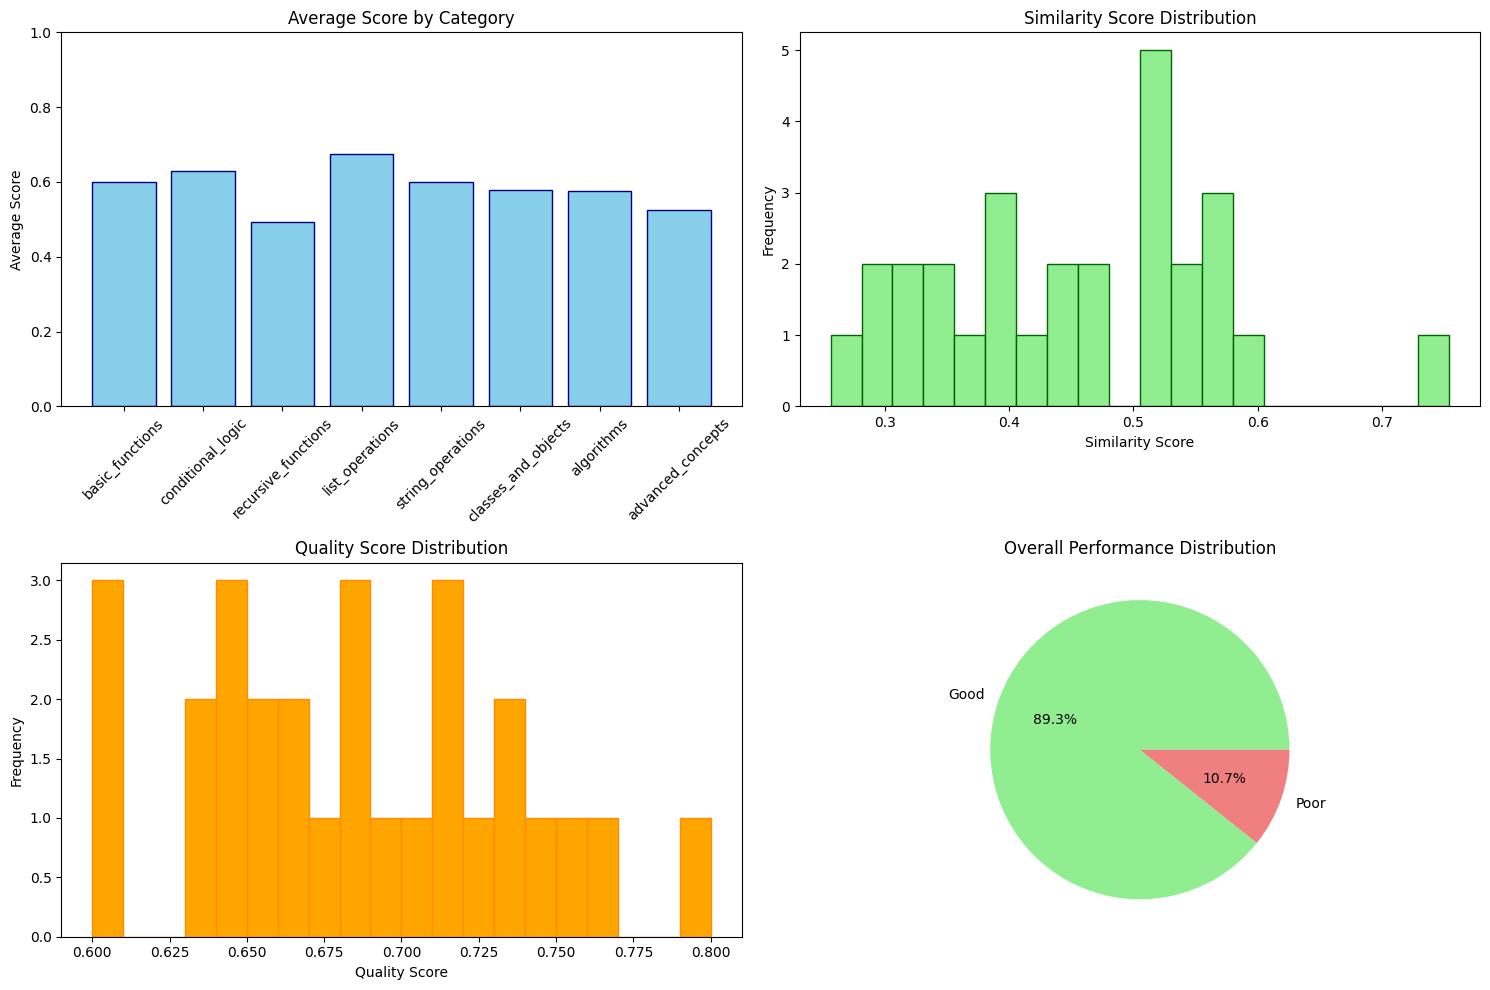

In [ ]:
"""
Comprehensive Model Testing Suite
Tests your trained model on all examples with detailed analysis
"""
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import json
import time
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict

class ComprehensiveModelTester:
    def __init__(self, model_path="./models/gpt2-a100-fixed"):
        print(f"Loading model from: {model_path}")

        self.tokenizer = GPT2Tokenizer.from_pretrained(model_path)
        self.model = GPT2LMHeadModel.from_pretrained(model_path)

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)
        self.model.eval()

        print(f"Model loaded on: {self.device}")
        print(f"Model parameters: {self.model.num_parameters():,}")

    def get_all_test_examples(self):
        """Comprehensive test examples covering all code types"""
        return {
            "basic_functions": [
                {
                    "code": "def add(a, b):\n    return a + b",
                    "expected": "This function takes two parameters a and b, and returns their sum.",
                    "category": "arithmetic"
                },
                {
                    "code": "def subtract(x, y):\n    return x - y",
                    "expected": "This function takes two parameters and returns their difference.",
                    "category": "arithmetic"
                },
                {
                    "code": "def multiply(a, b):\n    return a * b",
                    "expected": "This function multiplies two numbers and returns the result.",
                    "category": "arithmetic"
                },
                {
                    "code": "def divide(a, b):\n    return a / b if b != 0 else None",
                    "expected": "This function divides two numbers, returning None if the divisor is zero.",
                    "category": "arithmetic"
                }
            ],

            "conditional_logic": [
                {
                    "code": "def is_even(n):\n    return n % 2 == 0",
                    "expected": "This function checks if a number n is even by using the modulo operator to see if n is divisible by 2.",
                    "category": "boolean"
                },
                {
                    "code": "def is_odd(n):\n    return n % 2 != 0",
                    "expected": "This function checks if a number is odd by testing if it's not divisible by 2.",
                    "category": "boolean"
                },
                {
                    "code": "def is_positive(n):\n    return n > 0",
                    "expected": "This function checks if a number is positive by testing if it's greater than zero.",
                    "category": "boolean"
                },
                {
                    "code": "def max_of_two(a, b):\n    return a if a > b else b",
                    "expected": "This function returns the larger of two numbers using a conditional expression.",
                    "category": "comparison"
                }
            ],

            "recursive_functions": [
                {
                    "code": "def factorial(n):\n    if n <= 1:\n        return 1\n    return n * factorial(n-1)",
                    "expected": "This function calculates the factorial of n using recursion. If n is 1 or less, it returns 1, otherwise it returns n multiplied by the factorial of n-1.",
                    "category": "recursion"
                },
                {
                    "code": "def fibonacci(n):\n    if n <= 1:\n        return n\n    return fibonacci(n-1) + fibonacci(n-2)",
                    "expected": "This function calculates the nth Fibonacci number using recursion. It returns n if n is 0 or 1, otherwise returns the sum of the two previous Fibonacci numbers.",
                    "category": "recursion"
                },
                {
                    "code": "def power(base, exp):\n    if exp == 0:\n        return 1\n    return base * power(base, exp-1)",
                    "expected": "This function calculates base raised to the power of exp using recursion.",
                    "category": "recursion"
                }
            ],

            "list_operations": [
                {
                    "code": "def find_max(lst):\n    return max(lst)",
                    "expected": "This function finds and returns the maximum value in a list using the built-in max function.",
                    "category": "list_processing"
                },
                {
                    "code": "def find_min(lst):\n    return min(lst) if lst else None",
                    "expected": "This function finds the minimum value in a list, returning None if the list is empty.",
                    "category": "list_processing"
                },
                {
                    "code": "def list_sum(lst):\n    return sum(lst)",
                    "expected": "This function calculates the sum of all elements in a list.",
                    "category": "list_processing"
                },
                {
                    "code": "def list_average(lst):\n    return sum(lst) / len(lst) if lst else 0",
                    "expected": "This function calculates the average of numbers in a list, returning 0 if the list is empty.",
                    "category": "list_processing"
                }
            ],

            "string_operations": [
                {
                    "code": "def reverse_string(s):\n    return s[::-1]",
                    "expected": "This function reverses a string using Python's slice notation with a step of -1.",
                    "category": "string_manipulation"
                },
                {
                    "code": "def count_vowels(text):\n    vowels = 'aeiou'\n    return sum(1 for char in text.lower() if char in vowels)",
                    "expected": "This function counts the number of vowels in a text string by iterating through each character and checking if it's a vowel.",
                    "category": "string_manipulation"
                },
                {
                    "code": "def is_palindrome(s):\n    return s == s[::-1]",
                    "expected": "This function checks if a string is a palindrome by comparing it with its reverse.",
                    "category": "string_manipulation"
                },
                {
                    "code": "def capitalize_words(text):\n    return ' '.join(word.capitalize() for word in text.split())",
                    "expected": "This function capitalizes the first letter of each word in a text string.",
                    "category": "string_manipulation"
                }
            ],

            "classes_and_objects": [
                {
                    "code": "class Rectangle:\n    def __init__(self, width, height):\n        self.width = width\n        self.height = height",
                    "expected": "This class defines a Rectangle with a constructor that takes width and height parameters and stores them as instance variables.",
                    "category": "oop"
                },
                {
                    "code": "class Circle:\n    def __init__(self, radius):\n        self.radius = radius\n    def area(self):\n        return 3.14159 * self.radius ** 2",
                    "expected": "This class defines a Circle with a radius attribute and a method to calculate its area.",
                    "category": "oop"
                },
                {
                    "code": "class BankAccount:\n    def __init__(self, balance=0):\n        self.balance = balance\n    def deposit(self, amount):\n        self.balance += amount",
                    "expected": "This class represents a bank account with a balance and a method to deposit money.",
                    "category": "oop"
                }
            ],

            "algorithms": [
                {
                    "code": "def binary_search(arr, target):\n    left, right = 0, len(arr) - 1\n    while left <= right:\n        mid = (left + right) // 2\n        if arr[mid] == target:\n            return mid\n        elif arr[mid] < target:\n            left = mid + 1\n        else:\n            right = mid - 1\n    return -1",
                    "expected": "This function implements binary search algorithm to find a target value in a sorted array by repeatedly dividing the search space in half.",
                    "category": "search"
                },
                {
                    "code": "def bubble_sort(arr):\n    n = len(arr)\n    for i in range(n):\n        for j in range(0, n-i-1):\n            if arr[j] > arr[j+1]:\n                arr[j], arr[j+1] = arr[j+1], arr[j]",
                    "expected": "This function implements bubble sort algorithm to sort an array by repeatedly comparing adjacent elements and swapping them if they are in the wrong order.",
                    "category": "sorting"
                },
                {
                    "code": "def linear_search(arr, target):\n    for i, item in enumerate(arr):\n        if item == target:\n            return i\n    return -1",
                    "expected": "This function performs linear search to find a target value in an array by checking each element sequentially.",
                    "category": "search"
                }
            ],

            "advanced_concepts": [
                {
                    "code": "def decorator_example(func):\n    def wrapper(*args, **kwargs):\n        print('Before function call')\n        result = func(*args, **kwargs)\n        print('After function call')\n        return result\n    return wrapper",
                    "expected": "This function is a decorator that wraps another function to add behavior before and after the original function executes.",
                    "category": "decorators"
                },
                {
                    "code": "def list_comprehension_example(numbers):\n    return [x**2 for x in numbers if x % 2 == 0]",
                    "expected": "This function uses list comprehension to create a new list containing squares of even numbers from the input list.",
                    "category": "comprehensions"
                },
                {
                    "code": "def generator_example():\n    for i in range(5):\n        yield i**2",
                    "expected": "This function is a generator that yields squares of numbers from 0 to 4, producing values lazily.",
                    "category": "generators"
                }
            ]
        }

    def generate_explanation(self, code, strategy="balanced"):
        """Generate explanation with different strategies"""
        strategies = {
            "conservative": {"temperature": 0.3, "top_p": 0.8, "repetition_penalty": 1.3},
            "balanced": {"temperature": 0.7, "top_p": 0.9, "repetition_penalty": 1.1},
            "creative": {"temperature": 1.0, "top_p": 0.95, "repetition_penalty": 1.0}
        }

        params = strategies.get(strategy, strategies["balanced"])

        input_text = f"<code>{code}<sep>"
        inputs = self.tokenizer.encode(input_text, return_tensors='pt').to(self.device)

        with torch.no_grad():
            start_time = time.time()
            outputs = self.model.generate(
                inputs,
                max_new_tokens=80,
                temperature=params["temperature"],
                do_sample=True,
                top_p=params["top_p"],
                repetition_penalty=params["repetition_penalty"],
                pad_token_id=self.tokenizer.pad_token_id,
                eos_token_id=self.tokenizer.eos_token_id,
                no_repeat_ngram_size=3
            )
            generation_time = time.time() - start_time

        result = self.tokenizer.decode(outputs[0], skip_special_tokens=False)
        explanation = result.split('<sep>')[-1].replace('<|endoftext|>', '').replace('<pad>', '').strip()

        return explanation, generation_time

    def calculate_similarity(self, expected, generated):
        """Calculate similarity score between expected and generated explanations"""
        return SequenceMatcher(None, expected.lower(), generated.lower()).ratio()

    def calculate_keyword_score(self, expected, generated):
        """Calculate keyword overlap score"""
        expected_words = set(expected.lower().split())
        generated_words = set(generated.lower().split())

        # Remove common stop words
        stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'this', 'that'}
        expected_keywords = expected_words - stop_words
        generated_keywords = generated_words - stop_words

        if not expected_keywords:
            return 0.0

        overlap = len(expected_keywords.intersection(generated_keywords))
        return overlap / len(expected_keywords)

    def evaluate_quality(self, explanation, expected):
        """Comprehensive quality evaluation"""
        if not explanation or len(explanation) < 5:
            return {"overall": 0.0, "length": 0.0, "coherence": 0.0, "completeness": 0.0}

        # Length score (optimal range 30-150 characters)
        length = len(explanation)
        if 30 <= length <= 150:
            length_score = 1.0
        elif length < 15:
            length_score = 0.2
        elif length > 200:
            length_score = 0.7
        else:
            length_score = 0.8

        # Coherence score (based on sentence structure)
        coherence_score = 0.5
        if explanation[0].isupper():  # Starts with capital
            coherence_score += 0.2
        if explanation.endswith('.') or explanation.endswith('!'):  # Proper ending
            coherence_score += 0.2
        if ' ' in explanation and len(explanation.split()) >= 3:  # Multiple words
            coherence_score += 0.1

        # Completeness score (keyword overlap)
        completeness_score = self.calculate_keyword_score(expected, explanation)

        # Overall score
        overall_score = (length_score * 0.3 + coherence_score * 0.3 + completeness_score * 0.4)

        return {
            "overall": overall_score,
            "length": length_score,
            "coherence": coherence_score,
            "completeness": completeness_score
        }

    def run_comprehensive_test(self):
        """Run comprehensive testing on all examples"""
        print("\n" + "="*80)
        print("COMPREHENSIVE MODEL TESTING - ALL EXAMPLES")
        print("="*80)

        all_test_examples = self.get_all_test_examples()
        all_results = {}
        category_stats = defaultdict(list)
        overall_stats = {
            "total_examples": 0,
            "total_time": 0,
            "similarity_scores": [],
            "quality_scores": [],
            "good_explanations": 0
        }

        for category, examples in all_test_examples.items():
            print(f"\n{'='*60}")
            print(f"TESTING CATEGORY: {category.upper().replace('_', ' ')}")
            print(f"{'='*60}")

            category_results = []

            for i, example in enumerate(examples, 1):
                print(f"\n--- {category} Example {i} ---")
                print(f"Code:\n{example['code']}")
                print(f"\nExpected: {example['expected']}")

                # Test with different strategies
                strategies = ["conservative", "balanced", "creative"]
                best_explanation = ""
                best_score = 0
                best_time = 0

                for strategy in strategies:
                    explanation, gen_time = self.generate_explanation(example['code'], strategy)
                    similarity = self.calculate_similarity(example['expected'], explanation)
                    quality_metrics = self.evaluate_quality(explanation, example['expected'])

                    score = (similarity * 0.4 + quality_metrics['overall'] * 0.6)

                    print(f"{strategy.capitalize()}: {explanation}")
                    print(f"  Similarity: {similarity:.3f} | Quality: {quality_metrics['overall']:.3f} | Score: {score:.3f}")

                    if score > best_score:
                        best_score = score
                        best_explanation = explanation
                        best_time = gen_time

                # Determine if explanation is good
                is_good = best_score > 0.5
                if is_good:
                    overall_stats["good_explanations"] += 1

                print(f"\nBEST: {best_explanation}")
                print(f"Final Score: {best_score:.3f} | Quality: {'GOOD' if is_good else 'POOR'}")
                print(f"Generation Time: {best_time:.3f}s")

                # Store results
                result = {
                    'category': category,
                    'subcategory': example['category'],
                    'code': example['code'],
                    'expected': example['expected'],
                    'generated': best_explanation,
                    'similarity': self.calculate_similarity(example['expected'], best_explanation),
                    'quality_metrics': self.evaluate_quality(best_explanation, example['expected']),
                    'final_score': best_score,
                    'is_good': is_good,
                    'generation_time': best_time
                }

                category_results.append(result)
                category_stats[category].append(best_score)
                overall_stats["similarity_scores"].append(result['similarity'])
                overall_stats["quality_scores"].append(result['quality_metrics']['overall'])
                overall_stats["total_time"] += best_time
                overall_stats["total_examples"] += 1

            all_results[category] = category_results

            # Category summary
            avg_score = sum(category_stats[category]) / len(category_stats[category])
            good_count = sum(1 for r in category_results if r['is_good'])
            print(f"\n{category.upper()} SUMMARY:")
            print(f"Average Score: {avg_score:.3f}")
            print(f"Good Explanations: {good_count}/{len(category_results)} ({good_count/len(category_results)*100:.1f}%)")

        # Generate comprehensive report
        self.generate_comprehensive_report(all_results, overall_stats, category_stats)

        return all_results

    def generate_comprehensive_report(self, results, overall_stats, category_stats):
        """Generate detailed analysis report"""
        print("\n" + "="*80)
        print("COMPREHENSIVE ANALYSIS REPORT")
        print("="*80)

        total_examples = overall_stats["total_examples"]
        good_explanations = overall_stats["good_explanations"]
        accuracy = good_explanations / total_examples if total_examples > 0 else 0

        avg_similarity = sum(overall_stats["similarity_scores"]) / len(overall_stats["similarity_scores"])
        avg_quality = sum(overall_stats["quality_scores"]) / len(overall_stats["quality_scores"])
        avg_time = overall_stats["total_time"] / total_examples

        print(f"\n📊 OVERALL PERFORMANCE:")
        print(f"Total Examples Tested: {total_examples}")
        print(f"Good Quality Explanations: {good_explanations}")
        print(f"Overall Accuracy: {accuracy:.1%}")
        print(f"Average Similarity Score: {avg_similarity:.3f}")
        print(f"Average Quality Score: {avg_quality:.3f}")
        print(f"Average Generation Time: {avg_time:.3f}s")

        print(f"\nCATEGORY BREAKDOWN:")
        for category, scores in category_stats.items():
            avg_score = sum(scores) / len(scores)
            good_count = sum(1 for result_list in results[category] for result in [result_list] if result['is_good'])
            total_count = len(scores)

            print(f"{category.replace('_', ' ').title():<20}: {avg_score:.3f} avg | {good_count}/{total_count} good ({good_count/total_count*100:.1f}%)")

        # Performance interpretation
        print(f"\nPERFORMANCE INTERPRETATION:")
        if accuracy >= 0.8:
            print("EXCELLENT: Model generates high-quality explanations consistently")
        elif accuracy >= 0.6:
            print("GOOD: Model shows strong understanding with room for improvement")
        elif accuracy >= 0.4:
            print("FAIR: Model demonstrates basic understanding but needs enhancement")
        else:
            print("POOR: Model requires significant improvement or retraining")

        # Save detailed results
        import os
        os.makedirs("test_results", exist_ok=True)

        # Save JSON report
        report_data = {
            'overall_stats': {
                'total_examples': total_examples,
                'good_explanations': good_explanations,
                'accuracy': accuracy,
                'avg_similarity': avg_similarity,
                'avg_quality': avg_quality,
                'avg_generation_time': avg_time
            },
            'category_stats': {cat: {'avg_score': sum(scores)/len(scores), 'count': len(scores)}
                             for cat, scores in category_stats.items()},
            'detailed_results': results
        }

        with open("test_results/comprehensive_test_report.json", "w") as f:
            json.dump(report_data, f, indent=2, default=str)

        print(f"\nDetailed results saved to: test_results/comprehensive_test_report.json")

        # Create performance visualization
        self.create_performance_charts(category_stats, overall_stats)

    def create_performance_charts(self, category_stats, overall_stats):
        """Create performance visualization charts"""
        try:
            import matplotlib.pyplot as plt
            import seaborn as sns

            plt.style.use('default')
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

            # Category performance bar chart
            categories = list(category_stats.keys())
            avg_scores = [sum(scores)/len(scores) for scores in category_stats.values()]

            ax1.bar(categories, avg_scores, color='skyblue', edgecolor='navy')
            ax1.set_title('Average Score by Category')
            ax1.set_ylabel('Average Score')
            ax1.tick_params(axis='x', rotation=45)
            ax1.set_ylim(0, 1)

            # Similarity score distribution
            ax2.hist(overall_stats["similarity_scores"], bins=20, color='lightgreen', edgecolor='darkgreen')
            ax2.set_title('Similarity Score Distribution')
            ax2.set_xlabel('Similarity Score')
            ax2.set_ylabel('Frequency')

            # Quality score distribution
            ax3.hist(overall_stats["quality_scores"], bins=20, color='orange', edgecolor='darkorange')
            ax3.set_title('Quality Score Distribution')
            ax3.set_xlabel('Quality Score')
            ax3.set_ylabel('Frequency')

            # Performance summary pie chart
            good_count = overall_stats["good_explanations"]
            poor_count = overall_stats["total_examples"] - good_count

            ax4.pie([good_count, poor_count], labels=['Good', 'Poor'], autopct='%1.1f%%',
                   colors=['lightgreen', 'lightcoral'])
            ax4.set_title('Overall Performance Distribution')

            plt.tight_layout()
            plt.savefig('test_results/performance_analysis.png', dpi=300, bbox_inches='tight')
            print("Performance charts saved to: test_results/performance_analysis.png")

        except ImportError:
            print("Matplotlib not available - skipping chart generation")

def main():
    print("COMPREHENSIVE MODEL TESTING SUITE")
    print("="*50)

    # Check if model exists
    model_paths = [
        "./models/gpt2-a100-fixed",
        "./models/gpt2-a100-hf-optimized",
        "./models/gpt2-base-code-explanation"
    ]

    model_path = None
    for path in model_paths:
        try:
            # Quick check if model exists
            tokenizer = GPT2Tokenizer.from_pretrained(path)
            model_path = path
            print(f"Found model at: {path}")
            break
        except:
            continue

    if not model_path:
        print("No trained model found! Please train a model first.")
        return

    # Initialize tester
    tester = ComprehensiveModelTester(model_path)

    print(f"\nTesting model: {model_path}")
    print(f"This will test {sum(len(examples) for examples in tester.get_all_test_examples().values())} examples across all categories")

    input("Press Enter to start comprehensive testing...")

    # Run comprehensive test
    results = tester.run_comprehensive_test()

    print(f"\nComprehensive testing completed!")
    print(f"Check test_results/ folder for detailed reports and visualizations.")

if __name__ == "__main__":
    main()

🧪 TESTING MODEL ON test_tokenized.pt
✅ Found model: ./models/gpt2-a100-fixed
🔍 Loading model from: ./models/gpt2-a100-fixed
✅ Model loaded on: cuda
Model parameters: 124,441,344
📂 Loading test data from: data/tokenized/test_tokenized.pt
✅ Test data loaded:
  Examples: 20,413
  Input shape: torch.Size([512])

🎯 Starting comprehensive evaluation...
This will:
1. Calculate perplexity on test data
2. Analyze random examples with similarity scoring
3. Generate detailed performance report
4. Create visualizations

Press Enter to continue...2

📊 Calculating perplexity...
Using random subset of 1000 examples for perplexity calculation
  Processed batch 1/125
  Processed batch 51/125
  Processed batch 101/125

🔍 Analyzing 100 random test examples...
  Processing example 1/100
  Processing example 11/100
  Processing example 21/100
  Processing example 31/100
  Processing example 41/100
  Processing example 51/100
  Processing example 61/100
  Processing example 71/100
  Processing example 81/10

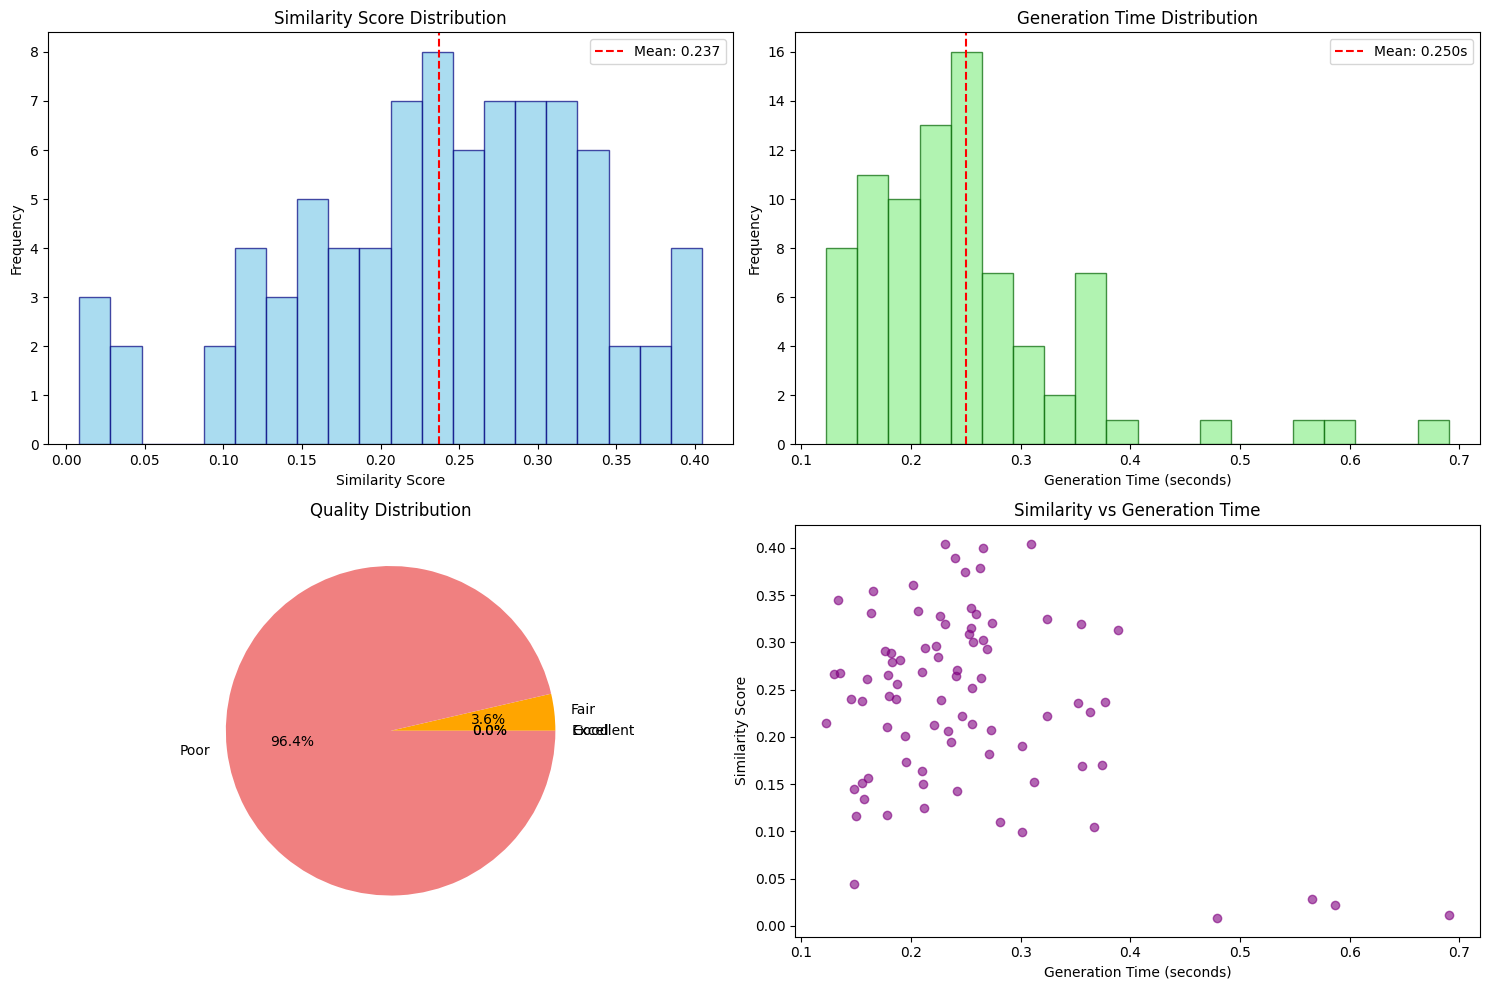

In [ ]:
"""
Test Model on test_tokenized.pt Dataset
Comprehensive evaluation on your actual test data
"""
import torch
import os
import json
import time
import numpy as np
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict
import matplotlib.pyplot as plt

class TestDataset(Dataset):
    def __init__(self, tokenized_data):
        if isinstance(tokenized_data['input_ids'][0], list):
            self.input_ids = [torch.tensor(ids, dtype=torch.long) for ids in tokenized_data['input_ids']]
            self.attention_mask = [torch.tensor(mask, dtype=torch.long) for mask in tokenized_data['attention_mask']]
        else:
            self.input_ids = tokenized_data['input_ids']
            self.attention_mask = tokenized_data['attention_mask']

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        input_ids = self.input_ids[idx]
        attention_mask = self.attention_mask[idx]

        if not isinstance(input_ids, torch.Tensor):
            input_ids = torch.tensor(input_ids, dtype=torch.long)
        if not isinstance(attention_mask, torch.Tensor):
            attention_mask = torch.tensor(attention_mask, dtype=torch.long)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': input_ids.clone()
        }

class ModelTestEvaluator:
    def __init__(self, model_path="./models/gpt2-a100-fixed"):
        print(f"Loading model from: {model_path}")

        self.tokenizer = GPT2Tokenizer.from_pretrained(model_path)
        self.model = GPT2LMHeadModel.from_pretrained(model_path)

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)
        self.model.eval()

        print(f"Model loaded on: {self.device}")
        print(f"Model parameters: {self.model.num_parameters():,}")

    def load_test_data(self, test_path="data/tokenized/test_tokenized.pt"):
        """Load and analyze test dataset"""
        if not os.path.exists(test_path):
            print(f"Test data not found at: {test_path}")
            print("Available files in data/tokenized/:")
            if os.path.exists("data/tokenized/"):
                for file in os.listdir("data/tokenized/"):
                    print(f"  - {file}")
            return None

        print(f"Loading test data from: {test_path}")
        test_data = torch.load(test_path, map_location='cpu')

        print(f"Test data loaded:")
        print(f"  Examples: {len(test_data['input_ids']):,}")
        print(f"  Input shape: {test_data['input_ids'][0].shape if hasattr(test_data['input_ids'][0], 'shape') else len(test_data['input_ids'][0])}")

        return test_data

    def calculate_perplexity(self, test_data, batch_size=8, max_samples=1000):
        """Calculate model perplexity on test data"""
        print(f"\nCalculating perplexity...")

        test_dataset = TestDataset(test_data)

        # Limit samples for faster evaluation if dataset is large
        if len(test_dataset) > max_samples:
            indices = torch.randperm(len(test_dataset))[:max_samples]
            test_subset = torch.utils.data.Subset(test_dataset, indices)
            print(f"Using random subset of {max_samples} examples for perplexity calculation")
        else:
            test_subset = test_dataset

        test_loader = DataLoader(
            test_subset,
            batch_size=batch_size,
            shuffle=False,
            pin_memory=True if self.device.type == 'cuda' else False
        )

        total_loss = 0
        total_tokens = 0
        num_batches = 0

        with torch.no_grad():
            for batch_idx, batch in enumerate(test_loader):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                outputs = self.model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    labels=labels
                )

                loss = outputs.loss
                total_loss += loss.item()
                total_tokens += attention_mask.sum().item()
                num_batches += 1

                if batch_idx % 50 == 0:
                    print(f"  Processed batch {batch_idx+1}/{len(test_loader)}")

        avg_loss = total_loss / num_batches
        perplexity = torch.exp(torch.tensor(avg_loss))

        return {
            'average_loss': avg_loss,
            'perplexity': float(perplexity),
            'total_batches': num_batches,
            'total_tokens': total_tokens
        }

    def decode_and_analyze_examples(self, test_data, num_examples=50):
        """Decode test examples and analyze model performance"""
        print(f"\nAnalyzing {num_examples} random test examples...")

        # Select random examples
        total_examples = len(test_data['input_ids'])
        indices = torch.randperm(total_examples)[:num_examples].tolist()

        results = []
        generation_times = []

        for i, idx in enumerate(indices):
            if i % 10 == 0:
                print(f"Processing example {i+1}/{num_examples}")

            # Decode the original example
            input_ids = test_data['input_ids'][idx]
            if isinstance(input_ids, list):
                input_ids = torch.tensor(input_ids)

            original_text = self.tokenizer.decode(input_ids, skip_special_tokens=False)

            # Try to extract code and expected explanation
            if '<sep>' in original_text:
                parts = original_text.split('<sep>')
                if len(parts) >= 2:
                    code_part = parts[0].replace('<code>', '').replace('<pad>', '').strip()
                    expected_explanation = parts[1].split('<|endoftext|>')[0].strip()

                    if len(code_part) > 10 and len(expected_explanation) > 5:
                        # Generate new explanation
                        generated_explanation, gen_time = self.generate_explanation(code_part)

                        # Calculate similarity
                        similarity = self.calculate_similarity(expected_explanation, generated_explanation)

                        result = {
                            'index': idx,
                            'code': code_part,
                            'expected': expected_explanation,
                            'generated': generated_explanation,
                            'similarity': similarity,
                            'generation_time': gen_time,
                            'original_length': len(original_text),
                            'code_length': len(code_part),
                            'expected_length': len(expected_explanation),
                            'generated_length': len(generated_explanation)
                        }

                        results.append(result)
                        generation_times.append(gen_time)

        return results, generation_times

    def generate_explanation(self, code):
        """Generate explanation for code"""
        input_text = f"<code>{code}<sep>"
        inputs = self.tokenizer.encode(input_text, return_tensors='pt').to(self.device)

        start_time = time.time()
        with torch.no_grad():
            outputs = self.model.generate(
                inputs,
                max_new_tokens=100,
                temperature=0.7,
                do_sample=True,
                top_p=0.9,
                repetition_penalty=1.1,
                pad_token_id=self.tokenizer.pad_token_id,
                eos_token_id=self.tokenizer.eos_token_id,
                no_repeat_ngram_size=3
            )
        generation_time = time.time() - start_time

        result = self.tokenizer.decode(outputs[0], skip_special_tokens=False)
        explanation = result.split('<sep>')[-1].replace('<|endoftext|>', '').replace('<pad>', '').strip()

        return explanation, generation_time

    def calculate_similarity(self, expected, generated):
        """Calculate similarity between expected and generated text"""
        from difflib import SequenceMatcher
        return SequenceMatcher(None, expected.lower(), generated.lower()).ratio()

    def analyze_results(self, results, perplexity_metrics):
        """Analyze and report results"""
        if not results:
            print("No valid examples found for analysis")
            return

        print(f"\n" + "="*80)
        print("COMPREHENSIVE TEST RESULTS ON test_tokenized.pt")
        print("="*80)

        # Basic statistics
        similarities = [r['similarity'] for r in results]
        gen_times = [r['generation_time'] for r in results]

        avg_similarity = np.mean(similarities)
        std_similarity = np.std(similarities)
        avg_gen_time = np.mean(gen_times)

        # Quality categories
        excellent = sum(1 for s in similarities if s >= 0.8)
        good = sum(1 for s in similarities if 0.6 <= s < 0.8)
        fair = sum(1 for s in similarities if 0.4 <= s < 0.6)
        poor = sum(1 for s in similarities if s < 0.4)

        print(f"\nPERFORMANCE METRICS:")
        print(f"Test Examples Analyzed: {len(results)}")
        print(f"Average Similarity: {avg_similarity:.3f} ± {std_similarity:.3f}")
        print(f"Average Generation Time: {avg_gen_time:.3f}s")

        print(f"\nQUALITY DISTRIBUTION:")
        print(f"Excellent (≥0.8): {excellent:3d} ({excellent/len(results)*100:.1f}%)")
        print(f"Good (0.6-0.8):   {good:3d} ({good/len(results)*100:.1f}%)")
        print(f"Fair (0.4-0.6):   {fair:3d} ({fair/len(results)*100:.1f}%)")
        print(f"Poor (<0.4):      {poor:3d} ({poor/len(results)*100:.1f}%)")

        print(f"\nPERPLEXITY METRICS:")
        print(f"Average Loss: {perplexity_metrics['average_loss']:.4f}")
        print(f"Perplexity: {perplexity_metrics['perplexity']:.2f}")
        print(f"Total Batches: {perplexity_metrics['total_batches']}")

        # Performance interpretation
        overall_score = (excellent + good) / len(results)
        print(f"\nOVERALL ASSESSMENT:")
        if overall_score >= 0.7:
            print("EXCELLENT: Model performs very well on test data")
        elif overall_score >= 0.5:
            print("GOOD: Model shows solid performance with room for improvement")
        elif overall_score >= 0.3:
            print("FAIR: Model demonstrates basic understanding but needs work")
        else:
            print("POOR: Model requires significant improvement")

        # Show best and worst examples
        print(f"\nBEST EXAMPLES (Top 3):")
        best_results = sorted(results, key=lambda x: x['similarity'], reverse=True)[:3]
        for i, result in enumerate(best_results, 1):
            print(f"\n{i}. Similarity: {result['similarity']:.3f}")
            print(f"Code: {result['code'][:100]}...")
            print(f"Expected: {result['expected'][:100]}...")
            print(f"Generated: {result['generated'][:100]}...")

        print(f"\nWORST EXAMPLES (Bottom 3):")
        worst_results = sorted(results, key=lambda x: x['similarity'])[:3]
        for i, result in enumerate(worst_results, 1):
            print(f"\n{i}. Similarity: {result['similarity']:.3f}")
            print(f"Code: {result['code'][:100]}...")
            print(f"Expected: {result['expected'][:100]}...")
            print(f"Generated: {result['generated'][:100]}...")

        # Save detailed results
        self.save_results(results, perplexity_metrics, {
            'avg_similarity': avg_similarity,
            'std_similarity': std_similarity,
            'avg_generation_time': avg_gen_time,
            'quality_distribution': {'excellent': excellent, 'good': good, 'fair': fair, 'poor': poor},
            'overall_score': overall_score
        })

        # Create visualizations
        self.create_visualizations(similarities, gen_times)

    def save_results(self, results, perplexity_metrics, summary_stats):
        """Save detailed results to JSON"""
        os.makedirs("test_results", exist_ok=True)

        report_data = {
            'test_dataset': 'test_tokenized.pt',
            'model_info': {
                'parameters': self.model.num_parameters(),
                'device': str(self.device)
            },
            'summary_statistics': summary_stats,
            'perplexity_metrics': perplexity_metrics,
            'detailed_results': results,
            'timestamp': time.strftime('%Y-%m-%d %H:%M:%S')
        }

        with open("test_results/test_tokenized_evaluation.json", "w") as f:
            json.dump(report_data, f, indent=2, default=str)

        print(f"\nDetailed results saved to: test_results/test_tokenized_evaluation.json")

    def create_visualizations(self, similarities, generation_times):
        """Create performance visualization charts"""
        try:
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

            # Similarity distribution
            ax1.hist(similarities, bins=20, color='skyblue', edgecolor='navy', alpha=0.7)
            ax1.set_title('Similarity Score Distribution')
            ax1.set_xlabel('Similarity Score')
            ax1.set_ylabel('Frequency')
            ax1.axvline(np.mean(similarities), color='red', linestyle='--', label=f'Mean: {np.mean(similarities):.3f}')
            ax1.legend()

            # Generation time distribution
            ax2.hist(generation_times, bins=20, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
            ax2.set_title('Generation Time Distribution')
            ax2.set_xlabel('Generation Time (seconds)')
            ax2.set_ylabel('Frequency')
            ax2.axvline(np.mean(generation_times), color='red', linestyle='--', label=f'Mean: {np.mean(generation_times):.3f}s')
            ax2.legend()

            # Quality categories pie chart
            excellent = sum(1 for s in similarities if s >= 0.8)
            good = sum(1 for s in similarities if 0.6 <= s < 0.8)
            fair = sum(1 for s in similarities if 0.4 <= s < 0.6)
            poor = sum(1 for s in similarities if s < 0.4)

            ax3.pie([excellent, good, fair, poor],
                   labels=['Excellent', 'Good', 'Fair', 'Poor'],
                   colors=['darkgreen', 'lightgreen', 'orange', 'lightcoral'],
                   autopct='%1.1f%%')
            ax3.set_title('Quality Distribution')

            # Similarity vs Generation Time scatter
            ax4.scatter(generation_times, similarities, alpha=0.6, color='purple')
            ax4.set_xlabel('Generation Time (seconds)')
            ax4.set_ylabel('Similarity Score')
            ax4.set_title('Similarity vs Generation Time')

            plt.tight_layout()
            plt.savefig('test_results/test_tokenized_analysis.png', dpi=300, bbox_inches='tight')
            print("Visualizations saved to: test_results/test_tokenized_analysis.png")

        except ImportError:
            print("Matplotlib not available - skipping visualizations")

def main():
    print("TESTING MODEL ON test_tokenized.pt")
    print("="*50)

    # Find available models
    model_paths = [
        "./models/gpt2-a100-fixed",
        "./models/gpt2-a100-hf-optimized",
        "./models/gpt2-base-code-explanation"
    ]

    model_path = None
    for path in model_paths:
        if os.path.exists(path):
            model_path = path
            print(f"Found model: {path}")
            break

    if not model_path:
        print("No trained model found!")
        return

    # Initialize evaluator
    evaluator = ModelTestEvaluator(model_path)

    # Load test data
    test_data = evaluator.load_test_data()
    if test_data is None:
        return

    print(f"\nStarting comprehensive evaluation...")
    print("This will:")
    print("1. Calculate perplexity on test data")
    print("2. Analyze random examples with similarity scoring")
    print("3. Generate detailed performance report")
    print("4. Create visualizations")

    input("\nPress Enter to continue...")

    # Calculate perplexity
    perplexity_metrics = evaluator.calculate_perplexity(test_data, batch_size=8, max_samples=1000)

    # Analyze examples
    results, generation_times = evaluator.decode_and_analyze_examples(test_data, num_examples=100)

    # Generate comprehensive analysis
    evaluator.analyze_results(results, perplexity_metrics)

    print(f"\nEvaluation completed!")
    print("Check test_results/ folder for detailed reports and visualizations.")

if __name__ == "__main__":
    main()